In [1]:
#Python3 program to calculate Root Mean Square

import math
#Function that Calculate Root Mean Square
def rmsValue(arr, n):
    square = 0
    mean = 0.0
    root = 0.0

    #Calculate square
    for i in range(0,n):
        square += (arr[i]**2)

    #Calculate Mean
    mean = (square / (float)(n))

    #Calculate Root
    root = math.sqrt(mean)

    return root

In [8]:
#driver code all nodes
import glob, os
from obspy import read
from obspy.core import UTCDateTime
mseed_data_temp = os.path.join(r"C:\Users\sofia\Documents\4th Year Project\Antarctica data Mer\Location 1\*\Jan 30\*.mseed")
mseed_data = glob.glob(mseed_data_temp)
#print(mseed_data)
vectors=[]
for i, trdata in enumerate(mseed_data):
    directory, filename = os.path.split(trdata)
    directory2, date = os.path.split(directory)
    directory3, node = os.path.split(directory2)
    directory4, location = os.path.split(directory3)
    directory5, Mer = os.path.split(directory4)
    print(f"Starting to calculate RMS signal for {location}, {node}, {date}")
    st = read(trdata) 
    RMS_vector = [0] * 24
    mean_tr_original = sum(st[0])/len(st[0])
    spikeless_tr = st[0].copy()
    spikeless_data = spikeless_tr.data
    for i in range(0, len(spikeless_data)):
        if abs(spikeless_data[i]) > 0.5:
            spikeless_data[i] = mean_tr_original

    for hour in range(24):
        print(f"Calculating RMS for {hour}:00-{hour+1}:00, on {date}, {location}, {node}")
        trace = spikeless_tr.copy()
        start = f"2022-01-30T{hour}:00:18"
        end_hour = hour + 1
        end_day = 30
        if end_hour >= 24:
            end_day += 1
            end_hour = end_hour % 24
        end = f"2022-01-{end_day}T{end_hour}:00:18"

        trim_trace = trace.trim(starttime=UTCDateTime(start), endtime=UTCDateTime(end))
        print(trim_trace)
    
        arr1 = trim_trace.data
        n1 = len(arr1)
        RMS_sig=rmsValue(arr1, n1)
        print(f"RMS_sig={RMS_sig}")
        
        
        from math import log10, floor
        def round_sig(x, sig=3):
            return round(x, sig-int(floor(log10(abs(x))))-1)
        RMS_sig_ro = round_sig(RMS_sig)
        print(f"RMS_sig_ro={RMS_sig_ro}")
        
        
        RMS_vector[hour]=RMS_sig_ro

    print(RMS_vector)
    vectors.append(RMS_vector)

print()
print()
print()
print(vectors)

Starting to calculate RMS signal for Location 1, Node 2402000014, Jan 30
Calculating RMS for 0:00-1:00, on Jan 30, Location 1, Node 2402000014
... | 2022-01-30T00:00:18.000000Z - 2022-01-30T01:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=3.064854988336666e-06
RMS_sig_ro=3.06e-06
Calculating RMS for 1:00-2:00, on Jan 30, Location 1, Node 2402000014
... | 2022-01-30T01:00:18.000000Z - 2022-01-30T02:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=3.7307939960846713e-06
RMS_sig_ro=3.73e-06
Calculating RMS for 2:00-3:00, on Jan 30, Location 1, Node 2402000014
... | 2022-01-30T02:00:18.000000Z - 2022-01-30T03:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=3.6334451260920287e-06
RMS_sig_ro=3.63e-06
Calculating RMS for 3:00-4:00, on Jan 30, Location 1, Node 2402000014
... | 2022-01-30T03:00:18.000000Z - 2022-01-30T04:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=4.132852169338014e-06
RMS_sig_ro=4.13e-06
Calculating RMS for 4:00-5:00, on Jan 30, Location 1, Node 2402000014
... | 2

RMS_sig=2.826264157832963e-06
RMS_sig_ro=2.83e-06
Calculating RMS for 13:00-14:00, on Jan 30, Location 1, Node 2402000017
... | 2022-01-30T13:00:18.000000Z - 2022-01-30T14:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=2.8273858529087988e-06
RMS_sig_ro=2.83e-06
Calculating RMS for 14:00-15:00, on Jan 30, Location 1, Node 2402000017
... | 2022-01-30T14:00:18.000000Z - 2022-01-30T15:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=2.960903062050463e-06
RMS_sig_ro=2.96e-06
Calculating RMS for 15:00-16:00, on Jan 30, Location 1, Node 2402000017
... | 2022-01-30T15:00:18.000000Z - 2022-01-30T16:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=2.8624297341221146e-06
RMS_sig_ro=2.86e-06
Calculating RMS for 16:00-17:00, on Jan 30, Location 1, Node 2402000017
... | 2022-01-30T16:00:18.000000Z - 2022-01-30T17:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=2.8657963700561413e-06
RMS_sig_ro=2.87e-06
Calculating RMS for 17:00-18:00, on Jan 30, Location 1, Node 2402000017
... | 2022-01-30T17

RMS_sig=3.1182994682836095e-06
RMS_sig_ro=3.12e-06
Calculating RMS for 1:00-2:00, on Jan 30, Location 1, Node 2402000019
... | 2022-01-30T01:00:18.000000Z - 2022-01-30T02:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=3.1826417440631273e-06
RMS_sig_ro=3.18e-06
Calculating RMS for 2:00-3:00, on Jan 30, Location 1, Node 2402000019
... | 2022-01-30T02:00:18.000000Z - 2022-01-30T03:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=3.2696474842043453e-06
RMS_sig_ro=3.27e-06
Calculating RMS for 3:00-4:00, on Jan 30, Location 1, Node 2402000019
... | 2022-01-30T03:00:18.000000Z - 2022-01-30T04:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=3.143361598944192e-06
RMS_sig_ro=3.14e-06
Calculating RMS for 4:00-5:00, on Jan 30, Location 1, Node 2402000019
... | 2022-01-30T04:00:18.000000Z - 2022-01-30T05:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=3.12408577028951e-06
RMS_sig_ro=3.12e-06
Calculating RMS for 5:00-6:00, on Jan 30, Location 1, Node 2402000019
... | 2022-01-30T05:00:18.0000

RMS_sig=5.5180166310403385e-06
RMS_sig_ro=5.52e-06
Calculating RMS for 14:00-15:00, on Jan 30, Location 1, Node 2402000020
... | 2022-01-30T14:00:18.000000Z - 2022-01-30T15:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=4.5351059920900215e-06
RMS_sig_ro=4.54e-06
Calculating RMS for 15:00-16:00, on Jan 30, Location 1, Node 2402000020
... | 2022-01-30T15:00:18.000000Z - 2022-01-30T16:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=4.2463193720022115e-06
RMS_sig_ro=4.25e-06
Calculating RMS for 16:00-17:00, on Jan 30, Location 1, Node 2402000020
... | 2022-01-30T16:00:18.000000Z - 2022-01-30T17:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=4.287116015683471e-06
RMS_sig_ro=4.29e-06
Calculating RMS for 17:00-18:00, on Jan 30, Location 1, Node 2402000020
... | 2022-01-30T17:00:18.000000Z - 2022-01-30T18:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=4.285987536032711e-06
RMS_sig_ro=4.29e-06
Calculating RMS for 18:00-19:00, on Jan 30, Location 1, Node 2402000020
... | 2022-01-30T18

RMS_sig=2.4927258609599464e-05
RMS_sig_ro=2.49e-05
Calculating RMS for 2:00-3:00, on Jan 30, Location 1, Node 2402000023
... | 2022-01-30T02:00:18.000000Z - 2022-01-30T03:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=1.541531769847001e-05
RMS_sig_ro=1.54e-05
Calculating RMS for 3:00-4:00, on Jan 30, Location 1, Node 2402000023
... | 2022-01-30T03:00:18.000000Z - 2022-01-30T04:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=2.334063751731512e-05
RMS_sig_ro=2.33e-05
Calculating RMS for 4:00-5:00, on Jan 30, Location 1, Node 2402000023
... | 2022-01-30T04:00:18.000000Z - 2022-01-30T05:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=2.7432970552182284e-05
RMS_sig_ro=2.74e-05
Calculating RMS for 5:00-6:00, on Jan 30, Location 1, Node 2402000023
... | 2022-01-30T05:00:18.000000Z - 2022-01-30T06:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=2.530993314966132e-05
RMS_sig_ro=2.53e-05
Calculating RMS for 6:00-7:00, on Jan 30, Location 1, Node 2402000023
... | 2022-01-30T06:00:18.0000

RMS_sig=0.00021490495626530644
RMS_sig_ro=0.000215
Calculating RMS for 15:00-16:00, on Jan 30, Location 1, Node 2402000024
... | 2022-01-30T15:00:18.000000Z - 2022-01-30T16:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=0.00014629625675714113
RMS_sig_ro=0.000146
Calculating RMS for 16:00-17:00, on Jan 30, Location 1, Node 2402000024
... | 2022-01-30T16:00:18.000000Z - 2022-01-30T17:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=7.525643135337981e-05
RMS_sig_ro=7.53e-05
Calculating RMS for 17:00-18:00, on Jan 30, Location 1, Node 2402000024
... | 2022-01-30T17:00:18.000000Z - 2022-01-30T18:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=6.530234649763724e-05
RMS_sig_ro=6.53e-05
Calculating RMS for 18:00-19:00, on Jan 30, Location 1, Node 2402000024
... | 2022-01-30T18:00:18.000000Z - 2022-01-30T19:00:18.000000Z | 500.0 Hz, 1800001 samples
RMS_sig=8.166820635408497e-05
RMS_sig_ro=8.17e-05
Calculating RMS for 19:00-20:00, on Jan 30, Location 1, Node 2402000024
... | 2022-01-30T19:

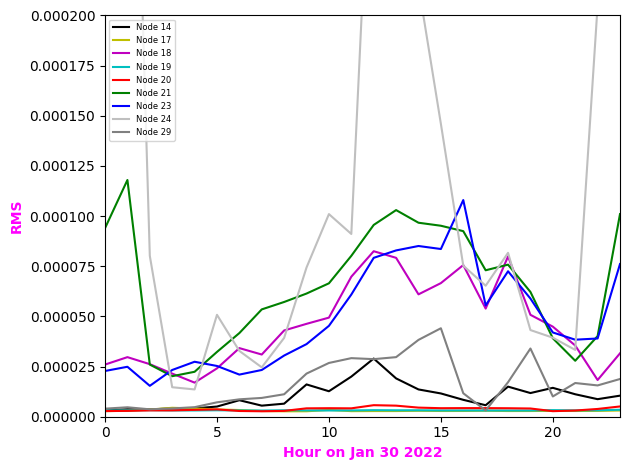

In [9]:
import numpy as np
from matplotlib import pyplot as plt
    
direc=r"C:\Users\sofia\Documents\4th Year Project\RMS\Location 1_new"    
t=np.arange(24)
plt.plot(t, vectors[0], 'k', label='Node 14')
plt.plot(t, vectors[1], 'y', label='Node 17')
plt.plot(t, vectors[2], 'm', label='Node 18')
plt.plot(t, vectors[3], 'c', label='Node 19')
plt.plot(t, vectors[4], 'r', label='Node 20')
plt.plot(t, vectors[5], 'g', label='Node 21')
plt.plot(t, vectors[6], 'b', label='Node 23')
plt.plot(t, vectors[7], c = '0.75', label='Node 24')
plt.plot(t, vectors[8], c = '0.5', label='Node 29')
plt. legend(loc='upper left', prop={'size':6})
plt.xlabel("Hour on Jan 30 2022",
               fontweight='bold', color='magenta')
plt.xlim(0,23)
plt.ylabel('RMS',
               fontweight ='bold', color='magenta')
plt.ylim(0,0.0002)
plt.tight_layout()
path_to_fig = os.path.join(direc, "RMSJAN30.png")
plt.savefig(path_to_fig)
plt.show()